# Data Lending Club - Práctica 1
## Juan Sevilla Fernandez

Lending Club es una de las empresas P2P más grandes, publica regularmente conjuntos de datos anonimizados de sus clientes que contienen características de los préstamos y los prestatarios. Esta información se puede utilizar para clasificar si un prestatario incumplirá o no con su préstamo.

Por ejemplo, los bancos suelen tener datos informativos para crear modelos que ayuden a decidir a quién conceder o denegar un préstamo. Es un problema de clasificación supervisado.


## Definición del problema:
Se desea predecir, antes de conceder un préstamo a una persona, la probabilidad de que no se devuelva completamente. Por tanto, todas las variables del dataset que se empleen para el modelo, deben poderse utilizar en el momento de su llamada. Para ello, se empleará un algoritmo de clasificación supervisado.

El fichero “Data_Dictionary.xls” contiene toda las variables y sus descripción a utilizar en el modelo de clasificación.

El conjunto de datos se encuentra en el fichero “pd_data_initial_preprocessing.csv”

La variable objetivo a predecir, que define si un cliente pagará una hipoteca o no es *loan_status* .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_poisson_deviance
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import sklearn
warnings.filterwarnings('ignore')

In [2]:
random_state = 100

In [3]:
# Read Data
data_raw_raw = pd.read_csv('pd_data_initial_preprocessing.csv')

In [4]:
# We only keep Charged off and Fully Paid loans
data_raw = data_raw_raw[(data_raw_raw['loan_status']=="Fully Paid")|(data_raw_raw['loan_status']=="Charged Off")]

## Puntos a resolver en la práctica:

Se pide realizar los siguientes puntos para resolver el problema de clasificación.

#### EJERCICIO 1:
Hacer un pequeño análisis descriptivo de los datos. Un análisis sencillo que incluya simplemente: (0,5 pts)

        ⁃	Cantidad de valores nulos.
        ⁃	tipo de variables (cat, float, etc.)
        ⁃	En la variable objetivo, distribución de sus valores.
        ⁃	Matriz de correlación en variables continuas.


In [5]:
#Print table with column nammes, number of NAs, perentage of NAs and variable type
pd.DataFrame({'Number_Missing': data_raw.isna().sum(),
              'Percent_Missing': round(data_raw.isnull().sum() * 100 / len(data_raw),2),
              'Type': data_raw.dtypes})

,Number_Missing,Percent_Missing,Type
id,0,0.00,object
url,0,0.00,object
zip_code,0,0.00,object
mths_since_last_record,359529,81.24,float64
il_util,421002,95.13,float64
mths_since_recent_bc_dlq,326642,73.81,float64
mths_since_rcnt_il,418344,94.53,float64
all_util,417786,94.40,float64
inq_fi,417783,94.40,float64
max_bal_bc,417783,94.40,float64


Se puede observar variables que no nos aportan informacion como por ejemplo id, url y zip code que eliminamos del data. Además, hay variable con un alto numero de NAs que limpiaremos en el segundo ejercicio. Se puede observar ademas que hay variables tanto categoricas como numéricas cuyos NAs procesaremos de forma diferente. 
Por ultimo, la variable objetivo esta guardada como object pero la cambio a 1 si esta pagada y 0 si no para poder compararla mediante correlacion con el resto de variables

In [6]:
data_raw['loan_status'].value_counts()

Fully Paid     345520
Charged Off     97047
Name: loan_status, dtype: int64

La variable objetvio no esta distribuida de forma equilibrada, lo que significa que al separar los datos en train y test tendremos que tenerlo en cuenta y ala hora de evaluar los modelos tener en mente que si predice todos los prestamos como fully paid no será bueno estimando por alta que sea el area bajo la curva.

In [20]:
data = data_raw.copy()
#delete unsued columns
del data["id"]
del data["url"]
del data["zip_code"]

In [21]:
data['loan_status'] = [1 if x == 'Fully Paid' else 0 for x in data['loan_status']]

In [ ]:
correlations = data.select_dtypes(exclude='object').corr()

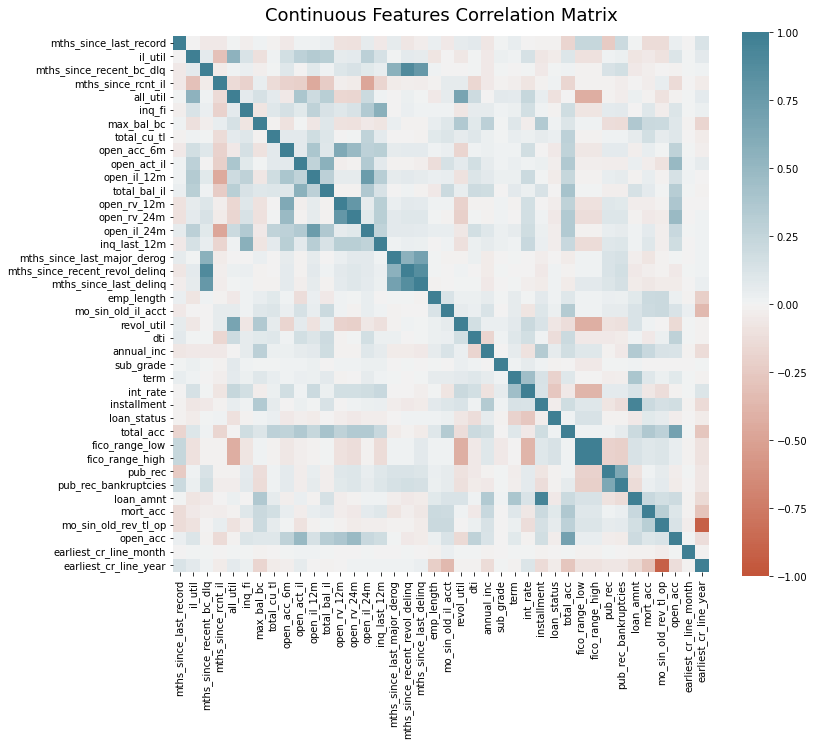

In [40]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlations,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=False,
    square=True
    );

ax.set_title('Continuous Features Correlation Matrix', fontdict={'fontsize':18}, pad=16);

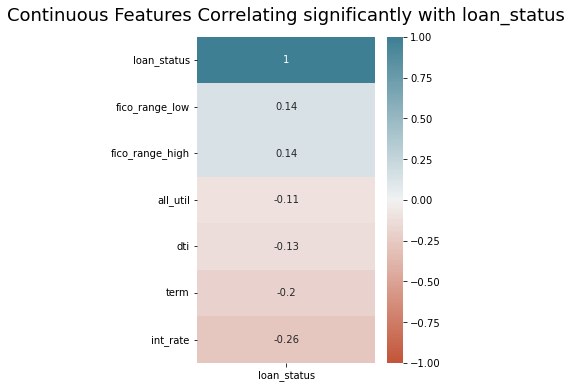

In [57]:
f, ax = plt.subplots(figsize=(4, 6))
sns.heatmap(
    correlations[['loan_status']].sort_values(by='loan_status',ascending=False)[abs(correlations['loan_status'])>0.1],
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot=True
    );

ax.set_title('Continuous Features Correlating significantly with loan_status', fontdict={'fontsize':18}, pad=16);

Filtramos las variables que tengan como minimo un valor absoluto de correlacion con loan_status del 10%. Vemos que las variables mas correlacionadas con el pago son los rangos de FICO (metrica para calcular la punuacion de credito del cliente) es decir, cuanta mayor puntuacion, mejor cliente es a priori.
Por otro lado las variables mas negativamente correlacionadas son el tiempo del prestamo y el tipo de interes, lo que tiene sentido puesto que mayor tiempo mas incertidumbre y probabilidad de impago, y a mayor tipo de inters, mas caro es el prestamo por lo que mas dificil es de pagar.

#### EJERCICIO 2:
Tratar los valores missing tanto en las variables continuas como discretas de forma correcta. Recordad que si existen muchos valores missing no es adecuado eliminar dichas filas. Como guía, recordad que los valores missing: (0,5 pts)

	⁃	En variables continuas se puede  sustituir por  la media o mediana, o por un valor muy distinto al resto de cantidades, que refleje que de algún modo que es un valor missing.
	⁃	En variables discretas se pueden sustituir por la moda o una clase nueva que indique que no tienen valor, p.e. “SIN VALOR”.
	⁃	Puede ser interesante, estudiar y evaluar algunos de los métodos de la librería sklearn.impute, como por ejemplo sklearn.impute.KNNimpute, que realiza una imputación mediante una regresión con KNN.

In [65]:
for col in data:
    #get dtype for column
    dt = data[col].dtype 
    #check if it is a numerical variable
    if dt == 'float64':
        if data[col].isnull().mean() > 0.8:
            data[col]=data[col].fillna(-10000)
        elif data[col].isnull().mean() > 0.4:
            data[col]=data[col].fillna(data[col].mean())
    #check if it is a categorical variable
    elif dt == 'object':
        data[col]=data[col].fillna("SIN TITULO")

In [67]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(data.select_dtypes(exclude='object'))
imputer.transform(data.select_dtypes(exclude='object'))

KeyboardInterrupt: 

Para tratar los NAs, he decidio hacer un for loop que discrimina variables numericas y categroicas.

    - Si la variable es numerica...
        - y el porcentage de NAs es muy alto, sustituye el NA por un valor constante muy diferente
        - y el porcentage de NAs es medianamente alto, sustituye el NA por la media de la variable
        - y el porcentage de NAs es bajo, sustituye el NA por un valor imputado mediante KNN impute
    - Si la variable es categorica, sustituye el NA por una etiqueta "SIN TITULO"
        

In [66]:
pd.DataFrame({'Number_Missing': data.isna().sum(),
              'Percent_Missing': round(data.isnull().sum() * 100 / len(data),2),
              'Type': data.dtypes})

,Number_Missing,Percent_Missing,Type
mths_since_last_record,0,0.00,float64
il_util,0,0.00,float64
mths_since_recent_bc_dlq,0,0.00,float64
mths_since_rcnt_il,0,0.00,float64
all_util,0,0.00,float64
inq_fi,0,0.00,float64
max_bal_bc,0,0.00,float64
total_cu_tl,0,0.00,float64
open_acc_6m,0,0.00,float64
open_act_il,0,0.00,float64


#### EJERCICIO 3:

Transformar las variables continuas, si fuera necesario, y las categóricas correctamente. (0,5 pts)


In [61]:
for col in data.select_dtypes(include='object'):
    print(data.select_dtypes(include='object')[col].value_counts())

Teacher                             7980
Manager                             7273
Registered Nurse                    3413
RN                                  3220
Supervisor                          3170
                                    ... 
testman                                1
S&D                                    1
utilization review specialist          1
Surgical Sterile Processing Tech       1
Manager Hotel Operations Oasis         1
Name: emp_title, Length: 125011, dtype: int64
Source Verified    181936
Not Verified       131307
Verified           129324
Name: verification_status, dtype: int64
MORTGAGE    220489
RENT        176094
OWN          45982
ANY              2
Name: home_ownership, dtype: int64
C    124956
B    119191
A     73568
D     71974
E     37618
F     11996
G      3264
Name: grade, dtype: int64
debt_consolidation    268151
credit_card            99463
home_improvement       26380
other                  20965
major_purchase          7852
medical            

In [22]:
cleanup_nums = {"grade": {"A": 7, "B": 6, "C": 5, "D": 4, "E": 3, "F": 2, "G": 1}}
data = data.replace(cleanup_nums)

In [23]:
# SOLO NUMERICAS POR HACER CATEGORICAS!!!!!!!

data = data.select_dtypes(exclude=['object'])

In [24]:
pd.DataFrame({'Number_Missing': data.isna().sum(),
              'Type': data.dtypes})

,Number_Missing,Type
mths_since_last_delinq,0,float64
emp_length,0,float64
mo_sin_old_il_acct,0,float64
revol_util,0,float64
dti,0,float64
annual_inc,0,float64
sub_grade,0,float64
grade,0,int64
term,0,float64
int_rate,0,float64


#### EJERCICIO 4:

Partir el conjunto de datos en un subconjunto de entrenamiento y otro de test. Recordad, que si la variable objetivo está desbalanceada, es fundamental, realizar una partición que conserve las proporciones originales en cada subconjunto. (0,5pt)

In [25]:
#Dividimos entre train y test en 70/30,
#manteniendo el mismo equilibrio entre pagados y no pagados en ambos subconjuntos
data_train, data_test = train_test_split(data, test_size = 0.3, 
                                         random_state = random_state, stratify=data['loan_paid'])

#### EJERCICIO 5: 
Vamos ha evaluar diferentes algoritmos de clasificación, para los cuales necesitaremos hacer los siguientes pasos:

	1.	Realizar algún tipo de transformación como escalado o normalización, si el método lo necesita.
	2.	Entrenar el modelo con el conjunto de datos de entrenamiento.
	3.	Mostrar cómo de bueno ha sido el entrenamiento.
	4.	Evaluar el modelo con el conjunto de datos de test. Para ellos se pedirán las siguiente métricas:
        ⁃	Accuracy
        ⁃	Precision
        ⁃	Recall
        ⁃	Confusion Matrix
        ⁃	F-SCORE
        ⁃	Curva ROC
        ⁃	Area bajo la curva.

In [26]:
from sklearn import metrics
from sklearn.metrics import (roc_curve, RocCurveDisplay, auc, confusion_matrix)
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Normalizamos el conjunto de entrenamiento y test que seran usados si el algoritmo lo requiere
scaler = StandardScaler()
train_scaler = scaler.fit(data_train)
data_train_norm = pd.DataFrame(index=data_train.index,
                               columns=data_train.columns,
                               data=train_scaler.transform(data_train))

scaler_test = StandardScaler()
test_scaler = scaler_test.fit(data_test)
data_test_norm = pd.DataFrame(index=data_test.index,
                               columns=data_test.columns,
                               data=test_scaler.transform(data_test))

Todos estos pasos serán necesarios evaluarlos para cada uno de los siguientes algoritmos:
 
	A.	Regresión logística (1 pt)
	B.	K-NN (1pt)
	C.	Arbol de decisión simple (1pt)
	D.	Bagging Classifier (1pt)
	E.	Random Forest (1pt)
	F.	GradientBoost (1pt)
	G.	XGBoost. (1pt)

##### A. Regresión logística (1 pt)

In [28]:
data_train_logit = data_train.copy()
data_test_logit = data_test.copy()
data_train_logit_norm = data_train_norm.copy()
data_test_logit_norm = data_test_norm.copy()

In [29]:
X_logit = data_train_logit_norm.drop(columns='loan_paid')
Y_logit = data_train_logit['loan_paid']

In [30]:
lr = LogisticRegression(random_state=random_state)
lr.fit(X_logit, Y_logit)
lr.score(X_logit, Y_logit)

0.6445457231281875

In [31]:
X_logit_test = data_test_logit_norm.drop(columns='loan_paid')
Y_logit_test = data_test_logit['loan_paid']

In [32]:
predicted_logit = lr.predict(X_logit_test)

Las métricas del modelo logístico son:
        ⁃ Accuracy:  0.582 
        ⁃ Precision:  0.587 
        ⁃ Recall:  0.3 
        ⁃ F-SCORE:  0.397 
        ⁃ Area bajo la curva:  0.582 
        ⁃ Confusion Matrix y Curva ROC: : 




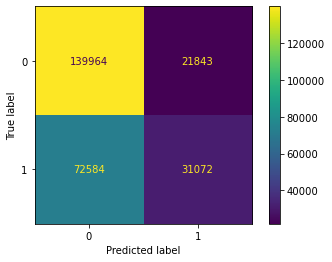

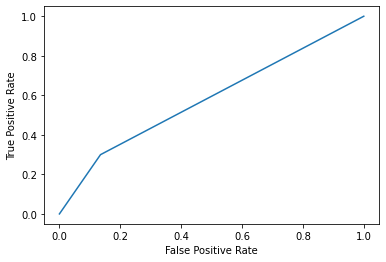

In [33]:
accuracy_logit = metrics.balanced_accuracy_score(y_true = Y_logit_test, y_pred = predicted_logit)
precission_logit = metrics.precision_score(y_true = Y_logit_test, y_pred = predicted_logit)
recall_logit = metrics.recall_score(y_true = Y_logit_test, y_pred = predicted_logit)
f_score_logit = metrics.f1_score(y_true = Y_logit_test, y_pred = predicted_logit)

cm_logit = metrics.confusion_matrix(y_true = Y_logit_test, y_pred = predicted_logit)
cm_disp_logit = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_logit)
cm_disp_logit.plot()

fpr, tpr, _ = roc_curve(Y_logit_test, predicted_logit)
ROC_disp_logit = RocCurveDisplay(fpr=fpr, tpr=tpr)
ROC_disp_logit.plot()

auc_logit = metrics.auc(fpr, tpr)



print(
    """\
Las métricas del modelo logístico son:
        ⁃ Accuracy: """,round(accuracy_logit,3),"""
        ⁃ Precision: """,round(precission_logit,3),"""
        ⁃ Recall: """,round(recall_logit,3),"""
        ⁃ F-SCORE: """,round(f_score_logit,3),"""
        ⁃ Area bajo la curva: """,round(auc_logit,3),"""
        ⁃ Confusion Matrix y Curva ROC: : \n
""")
plt.show()

##### B. K-NN (1pt)

In [34]:
data_train_knn = data_train.copy()
data_test_knn = data_test.copy()
data_train_knn_norm = data_train_norm.copy()
data_test_knn_norm = data_test_norm.copy()

In [35]:
X_knn = data_train_knn_norm.drop(columns='loan_paid')
Y_knn = data_train_knn['loan_paid']

In [37]:
knn = KNeighborsClassifier(3)
knn.fit(X_knn, Y_knn)

KNeighborsClassifier(n_neighbors=3)

In [38]:
X_knn_test = data_test_knn_norm.drop(columns='loan_paid')
Y_knn_test = data_test_knn['loan_paid']

In [39]:
predicted_knn = knn.predict(X_knn_test)
predicted_knn

KeyboardInterrupt: 

In [ ]:
accuracy_knn = metrics.balanced_accuracy_score(y_true = Y_knn_test, y_pred = predicted_knn)
precission_knn = metrics.precision_score(y_true = Y_knn_test, y_pred = predicted_knn)
recall_knn = metrics.recall_score(y_true = Y_knn_test, y_pred = predicted_knn)
f_score_knn = metrics.f1_score(y_true = Y_knn_test, y_pred = predicted_knn)

cm_knn = metrics.confusion_matrix(y_true = Y_knn_test, y_pred = predicted_knn)
cm_disp_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn)
cm_disp_knn.plot()

fpr, tpr, _ = roc_curve(Y_knn_test, predicted_knn)
ROC_disp_knn = RocCurveDisplay(fpr=fpr, tpr=tpr)
ROC_disp_knn.plot()

auc_knn = metrics.auc(fpr, tpr)



print(
    """\
Las métricas del modelo KNN son:
        ⁃ Accuracy: """,round(accuracy_knn,3),"""
        ⁃ Precision: """,round(precission_knn,3),"""
        ⁃ Recall: """,round(recall_knn,3),"""
        ⁃ F-SCORE: """,round(f_score_knn,3),"""
        ⁃ Area bajo la curva: """,round(auc_knn,3),"""
        ⁃ Confusion Matrix y Curva ROC: : \n
""")
plt.show()

##### C. Arbol de decisión simple (1pt)

In [40]:
from sklearn.tree import DecisionTreeClassifier
data_train_tree = data_train.copy()
data_test_tree = data_test.copy()

In [41]:
X_tree = data_train_tree.drop(columns='loan_paid')
Y_tree = data_train_tree['loan_paid']

In [42]:
tree = DecisionTreeClassifier(random_state=random_state, max_depth=6)
tree.fit(X_tree, Y_tree)
tree.score(X_tree, Y_tree)

0.6470287191260112

In [43]:
X_tree_test = data_test_tree.drop(columns='loan_paid')
Y_tree_test = data_test_tree['loan_paid']

In [44]:
predicted_tree = tree.predict(X_tree_test)

Las métricas del modelo tree son:
        ⁃ Accuracy:  0.596 
        ⁃ Precision:  0.576 
        ⁃ Recall:  0.362 
        ⁃ F-SCORE:  0.445 
        ⁃ Area bajo la curva:  0.596 
        ⁃ Confusion Matrix y Curva ROC: : 




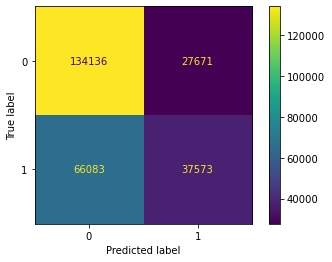

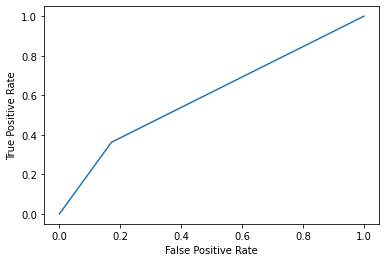

In [45]:
accuracy_tree = metrics.balanced_accuracy_score(y_true = Y_tree_test, y_pred = predicted_tree)
precission_tree = metrics.precision_score(y_true = Y_tree_test, y_pred = predicted_tree)
recall_tree = metrics.recall_score(y_true = Y_tree_test, y_pred = predicted_tree)
f_score_tree = metrics.f1_score(y_true = Y_tree_test, y_pred = predicted_tree)

cm_tree = metrics.confusion_matrix(y_true = Y_tree_test, y_pred = predicted_tree)
cm_disp_tree = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_tree)
cm_disp_tree.plot()

fpr, tpr, _ = roc_curve(Y_tree_test, predicted_tree)
ROC_disp_tree = RocCurveDisplay(fpr=fpr, tpr=tpr)
ROC_disp_tree.plot()

auc_tree = metrics.auc(fpr, tpr)



print(
    """\
Las métricas del modelo tree son:
        ⁃ Accuracy: """,round(accuracy_tree,3),"""
        ⁃ Precision: """,round(precission_tree,3),"""
        ⁃ Recall: """,round(recall_tree,3),"""
        ⁃ F-SCORE: """,round(f_score_tree,3),"""
        ⁃ Area bajo la curva: """,round(auc_tree,3),"""
        ⁃ Confusion Matrix y Curva ROC: : \n
""")
plt.show()

##### D. Bagging Classifier (1pt)

In [46]:
from  sklearn.ensemble import BaggingClassifier
data_train_bagging = data_train.copy()
data_test_bagging = data_test.copy()

In [47]:
X_bagging = data_train_bagging.drop(columns='loan_paid')
Y_bagging = data_train_bagging['loan_paid']

In [48]:
bagging = BaggingClassifier(n_estimators=1)
bagging.fit(X_bagging, Y_bagging)
bagging.score(X_bagging, Y_bagging)

0.8711118429868279

In [49]:
X_bagging_test = data_test_bagging.drop(columns='loan_paid')
Y_bagging_test = data_test_bagging['loan_paid']

In [50]:
predicted_bagging = bagging.predict(X_bagging_test)

Las métricas del modelo bagging son:
        ⁃ Accuracy:  0.632 
        ⁃ Precision:  0.549 
        ⁃ Recall:  0.558 
        ⁃ F-SCORE:  0.554 
        ⁃ Area bajo la curva:  0.632 
        ⁃ Confusion Matrix y Curva ROC: : 




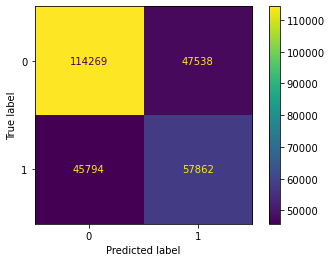

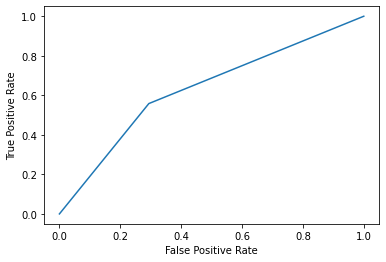

In [51]:
accuracy_bagging = metrics.balanced_accuracy_score(y_true = Y_bagging_test, y_pred = predicted_bagging)
precission_bagging = metrics.precision_score(y_true = Y_bagging_test, y_pred = predicted_bagging)
recall_bagging = metrics.recall_score(y_true = Y_bagging_test, y_pred = predicted_bagging)
f_score_bagging = metrics.f1_score(y_true = Y_bagging_test, y_pred = predicted_bagging)

cm_bagging = metrics.confusion_matrix(y_true = Y_bagging_test, y_pred = predicted_bagging)
cm_disp_bagging = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_bagging)
cm_disp_bagging.plot()

fpr, tpr, _ = roc_curve(Y_bagging_test, predicted_bagging)
ROC_disp_bagging = RocCurveDisplay(fpr=fpr, tpr=tpr)
ROC_disp_bagging.plot()

auc_bagging = metrics.auc(fpr, tpr)



print(
    """\
Las métricas del modelo bagging son:
        ⁃ Accuracy: """,round(accuracy_bagging,3),"""
        ⁃ Precision: """,round(precission_bagging,3),"""
        ⁃ Recall: """,round(recall_bagging,3),"""
        ⁃ F-SCORE: """,round(f_score_bagging,3),"""
        ⁃ Area bajo la curva: """,round(auc_bagging,3),"""
        ⁃ Confusion Matrix y Curva ROC: : \n
""")
plt.show()

##### E. Random Forest (1pt)

In [52]:
from sklearn.ensemble import RandomForestClassifier
data_train_forest = data_train.copy()
data_test_forest = data_test.copy()

In [53]:
X_forest = data_train_forest.drop(columns='loan_paid')
Y_forest = data_train_forest['loan_paid']

In [54]:
forest = RandomForestClassifier()
forest.fit(X_forest, Y_forest)
forest.score(X_forest, Y_forest)

0.9999935422730876

In [55]:
X_forest_test = data_test_forest.drop(columns='loan_paid')
Y_forest_test = data_test_forest['loan_paid']

In [56]:
predicted_forest = forest.predict(X_forest_test)
predicted_forest

array([ True, False, False, ..., False, False, False])

Las métricas del modelo forest son:
        ⁃ Accuracy:  0.685 
        ⁃ Precision:  0.708 
        ⁃ Recall:  0.502 
        ⁃ F-SCORE:  0.587 
        ⁃ Area bajo la curva:  0.685 
        ⁃ Confusion Matrix y Curva ROC: : 




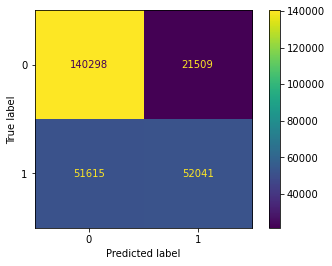

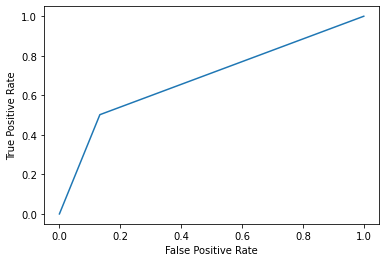

In [57]:
accuracy_forest = metrics.balanced_accuracy_score(y_true = Y_forest_test, y_pred = predicted_forest)
precission_forest = metrics.precision_score(y_true = Y_forest_test, y_pred = predicted_forest)
recall_forest = metrics.recall_score(y_true = Y_forest_test, y_pred = predicted_forest)
f_score_forest = metrics.f1_score(y_true = Y_forest_test, y_pred = predicted_forest)

cm_forest = metrics.confusion_matrix(y_true = Y_forest_test, y_pred = predicted_forest)
cm_disp_forest = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_forest)
cm_disp_forest.plot()

fpr, tpr, _ = roc_curve(Y_forest_test, predicted_forest)
ROC_disp_forest = RocCurveDisplay(fpr=fpr, tpr=tpr)
ROC_disp_forest.plot()

auc_forest = metrics.auc(fpr, tpr)



print(
    """\
Las métricas del modelo forest son:
        ⁃ Accuracy: """,round(accuracy_forest,3),"""
        ⁃ Precision: """,round(precission_forest,3),"""
        ⁃ Recall: """,round(recall_forest,3),"""
        ⁃ F-SCORE: """,round(f_score_forest,3),"""
        ⁃ Area bajo la curva: """,round(auc_forest,3),"""
        ⁃ Confusion Matrix y Curva ROC: : \n
""")
plt.show()

##### F. GradientBoost (1pt)

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
data_train_gradient = data_train.copy()
data_test_gradient = data_test.copy()

In [59]:
X_gradient = data_train_gradient.drop(columns='loan_paid')
Y_gradient = data_train_gradient['loan_paid']

In [60]:
gradient = GradientBoostingClassifier()
gradient.fit(X_gradient, Y_gradient)
gradient.score(X_gradient, Y_gradient)

0.7011606149693339

In [61]:
X_gradient_test = data_test_gradient.drop(columns='loan_paid')
Y_gradient_test = data_test_gradient['loan_paid']

In [62]:
predicted_gradient = gradient.predict(X_gradient_test)
predicted_gradient

array([False, False, False, ..., False,  True, False])

Las métricas del modelo gradient son:
        ⁃ Accuracy:  0.65 
        ⁃ Precision:  0.69 
        ⁃ Recall:  0.421 
        ⁃ F-SCORE:  0.523 
        ⁃ Area bajo la curva:  0.65 
        ⁃ Confusion Matrix y Curva ROC: : 




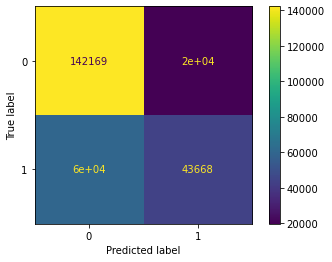

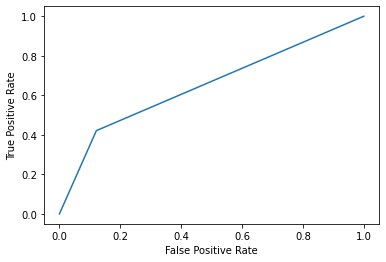

In [63]:
accuracy_gradient = metrics.balanced_accuracy_score(y_true = Y_gradient_test, y_pred = predicted_gradient)
precission_gradient = metrics.precision_score(y_true = Y_gradient_test, y_pred = predicted_gradient)
recall_gradient = metrics.recall_score(y_true = Y_gradient_test, y_pred = predicted_gradient)
f_score_gradient = metrics.f1_score(y_true = Y_gradient_test, y_pred = predicted_gradient)

cm_gradient = metrics.confusion_matrix(y_true = Y_gradient_test, y_pred = predicted_gradient)
cm_disp_gradient = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_gradient)
cm_disp_gradient.plot()

fpr, tpr, _ = roc_curve(Y_gradient_test, predicted_gradient)
ROC_disp_gradient = RocCurveDisplay(fpr=fpr, tpr=tpr)
ROC_disp_gradient.plot()

auc_gradient = metrics.auc(fpr, tpr)



print(
    """\
Las métricas del modelo gradient son:
        ⁃ Accuracy: """,round(accuracy_gradient,3),"""
        ⁃ Precision: """,round(precission_gradient,3),"""
        ⁃ Recall: """,round(recall_gradient,3),"""
        ⁃ F-SCORE: """,round(f_score_gradient,3),"""
        ⁃ Area bajo la curva: """,round(auc_gradient,3),"""
        ⁃ Confusion Matrix y Curva ROC: : \n
""")
plt.show()

##### G. XGBoost. (1pt)

In [64]:
import xgboost as xgb
data_train_xgb = data_train.copy()
data_test_xgb = data_test.copy()

In [65]:
X_xgb = data_train_xgb.drop(columns='loan_paid')
Y_xgb = data_train_xgb['loan_paid']

In [ ]:
xgb = xgb.XGBClassifier(n_estimators=6, objective='reg:squarederror')
xgb.fit(X_xgb, Y_xgb)
xgb.score(X_xgb, Y_xgb)

In [ ]:
X_xgb_test = data_test_xgb.drop(columns='loan_paid')
Y_xgb_test = data_test_xgb['loan_paid']

In [ ]:
predicted_xgb = xgb.predict(X_xgb_test)
predicted_xgb

In [ ]:
accuracy_xgb = metrics.balanced_accuracy_score(y_true = Y_xgb_test, y_pred = predicted_xgb)
precission_xgb = metrics.precision_score(y_true = Y_xgb_test, y_pred = predicted_xgb)
recall_xgb = metrics.recall_score(y_true = Y_xgb_test, y_pred = predicted_xgb)
f_score_xgb = metrics.f1_score(y_true = Y_xgb_test, y_pred = predicted_xgb)

cm_xgb = metrics.confusion_matrix(y_true = Y_xgb_test, y_pred = predicted_xgb)
cm_disp_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
cm_disp_xgb.plot()

fpr, tpr, _ = roc_curve(Y_xgb_test, predicted_xgb)
ROC_disp_xgb = RocCurveDisplay(fpr=fpr, tpr=tpr)
ROC_disp_xgb.plot()

auc_xgb = metrics.auc(fpr, tpr)



print(
    """\
Las métricas del modelo xgb son:
        ⁃ Accuracy: """,round(accuracy_xgb,3),"""
        ⁃ Precision: """,round(precission_xgb,3),"""
        ⁃ Recall: """,round(recall_xgb,3),"""
        ⁃ F-SCORE: """,round(f_score_xgb,3),"""
        ⁃ Area bajo la curva: """,round(auc_xgb,3),"""
        ⁃ Confusion Matrix y Curva ROC: : \n
""")
plt.show()

#### EJERCICIO 6:
Cual de todas las métricas crees que es la más conveniente?. Ordena todos los métodos de mejor a peor según dichas métricas. (0,5pt)

#### EJERCICIO 7:
En esta práctica no hemos abordado todavía la importancia de hacer una correcta preselección y transformación de variables antes de entrenar un modelo. Sin embargo , los ensambladores nos pueden dar una buena pista, de que variables elegir a la hora de entrenar un modelo de clasificación o regresión.  ¿Cómo medirías que importancia tiene cada variable a la hora de clasificar correctamente la variable objetivo? Haciendo uso de alguno de los métodos propuestos, Muestra una gráfica que presente de forma ordenada la importancia que tiene cada variable en la clasificación (0,5pt)

In [ ]:
import subprocess

applescript = """
display dialog "CODE EXECUTED" ¬
with title "This is a pop-up window" ¬
buttons {"OK"} 
"""

subprocess.call("osascript -e '{}'".format(applescript), shell=True)

Dudas:
1. Los NAs son un 72% de los datos
2. Las metrics se calculan sobre los datos de test?
3. Como calcular metricas para agoritmos que devuelben decimal y no binario
4. Cual es la mejor forma de podar arboles?
